<a href="https://colab.research.google.com/github/Takouabelwafa/Test-Technique-Full-Pack-AI-/blob/main/kaggelsubmitProjet3_testTechniquefinale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

In [4]:
# Mount the files from Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Mount the files from Google Drive
from google.colab import drive
drive.mount('/content/drive')
# Unzip the folder
import zipfile

with zipfile.ZipFile("/content/drive/MyDrive/house-prices-advanced-regression-techniques.zip", "r") as zip_ref:
    zip_ref.extractall("/content/drive/MyDrive/house_prices")

import zipfile, pandas as pd, os


# load files  train.csv and test.csv
train_csv = "/content/drive/MyDrive/house_prices/train.csv"
test_csv  = "/content/drive/MyDrive/house_prices/test.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#  Extract and load the data + preview
---



In [6]:
import zipfile, pandas as pd, os


# load files  train.csv and test.csv
train_csv = "/content/drive/MyDrive/house_prices/train.csv"
test_csv  = "/content/drive/MyDrive/house_prices/test.csv"

df = pd.read_csv(train_csv)
df_test = pd.read_csv(test_csv)

print("Train shape:", df.shape)
print("Test shape:", df_test.shape)


Train shape: (1460, 81)
Test shape: (1459, 80)


In [7]:
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Quick EDA: statistics, missing values, correlation

In [10]:
df['SalePrice'].describe().round(2)


,SalePrice
count,1460.0
mean,180921.2
std,79442.5
min,34900.0
25%,129975.0
50%,163000.0
75%,214000.0
max,755000.0


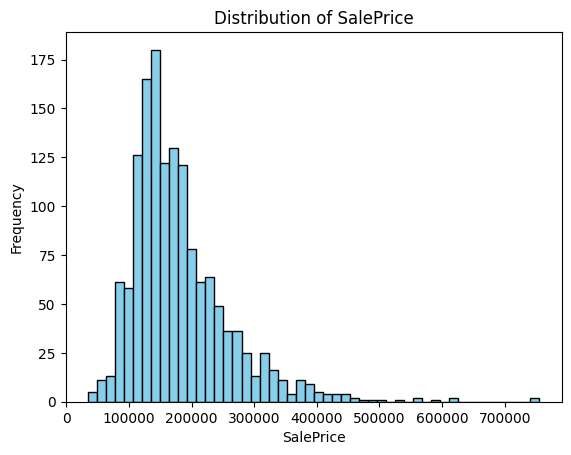

In [11]:
# Visualize the target column 'SalePrice'
df['SalePrice'].plot(kind='hist', bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()

array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>],
       [<Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>],
       [<Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,

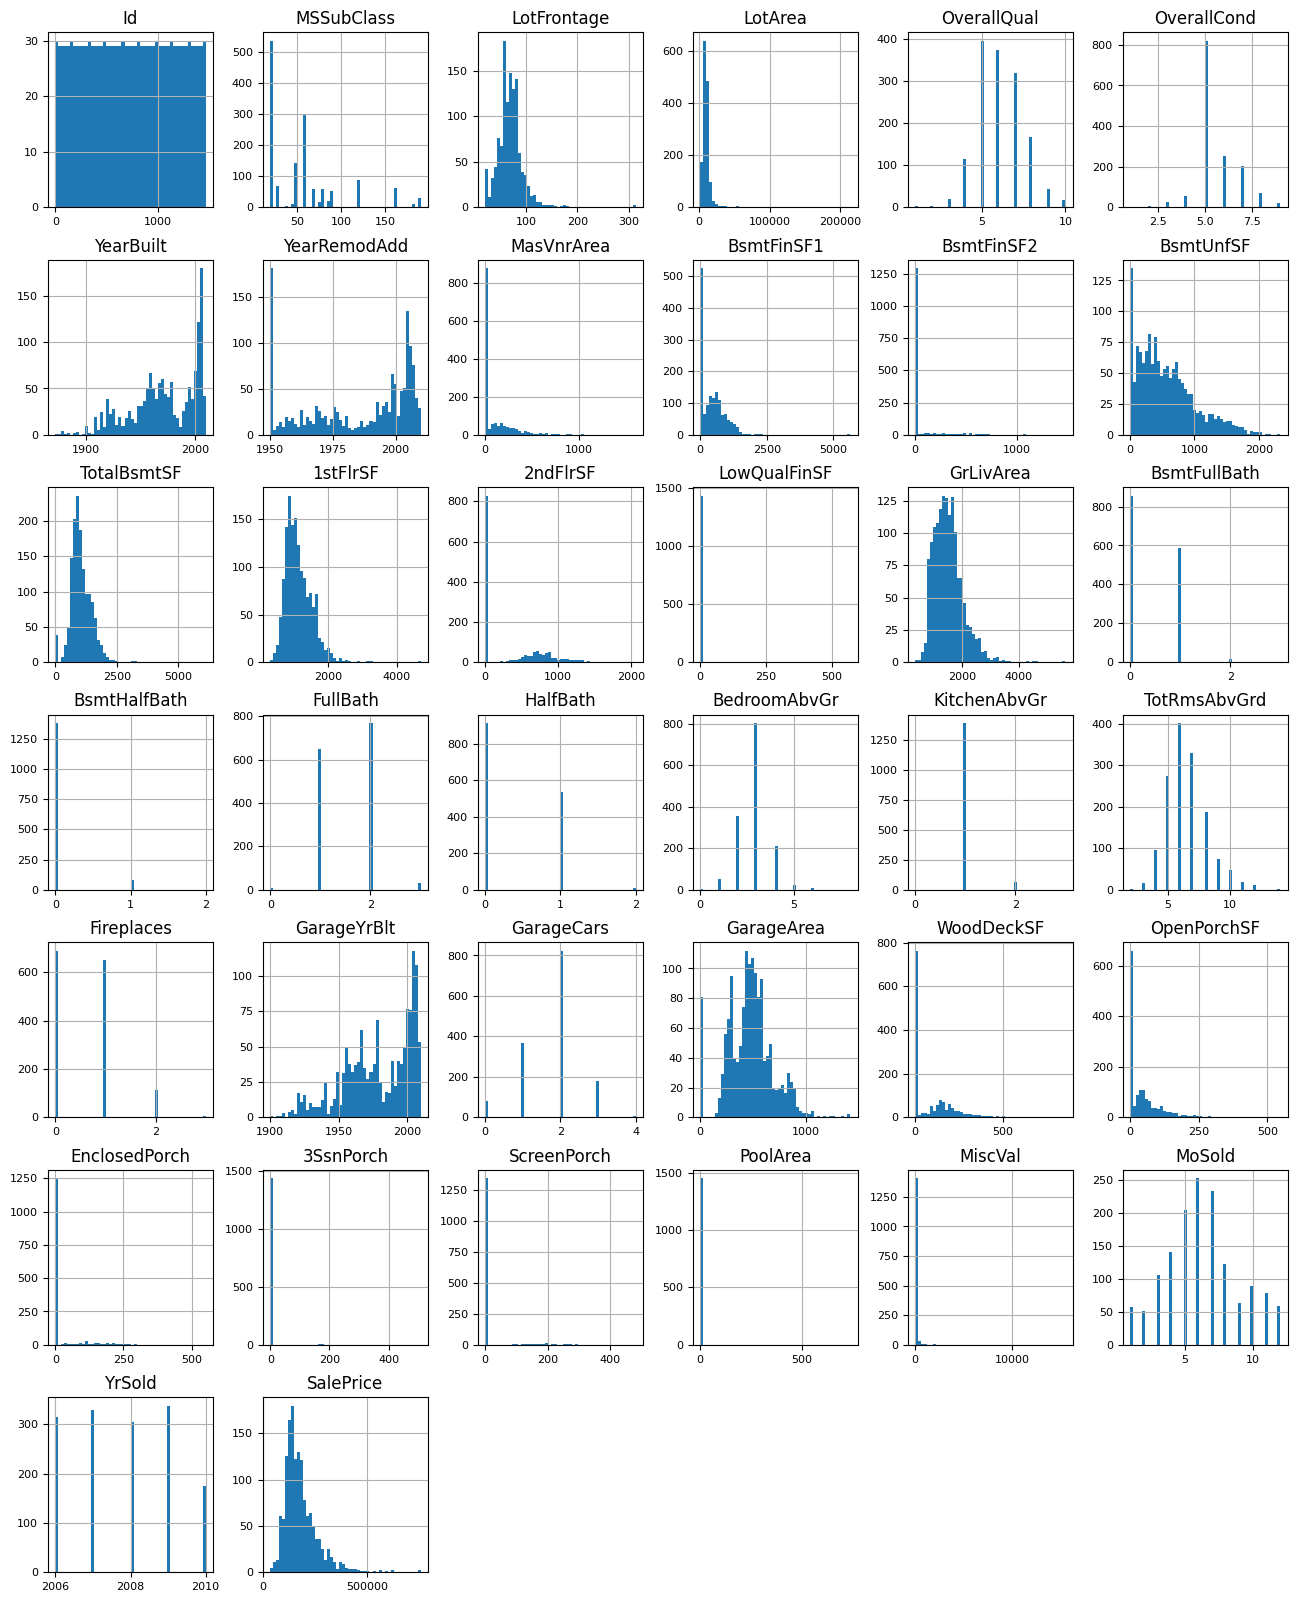

In [12]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [13]:
#pourcentage de valeur manquant par colone
missing = df.isna().mean().sort_values(ascending=False)
missing.head(20)

,0
PoolQC,0.995205
MiscFeature,0.963014
Alley,0.937671
Fence,0.807534
MasVnrType,0.597260
FireplaceQu,0.472603
LotFrontage,0.177397
GarageQual,0.055479
GarageFinish,0.055479
GarageType,0.055479


In [14]:
# Copy the DataFrame
data=df.copy()
# Drop the ID column
data.drop('Id',axis=1,inplace=True)
target=data['SalePrice']

In [15]:
# Numeric columns and correlation with SalePrice
num_cols = data.select_dtypes(include=[np.number]).columns.tolist()
corr_with_target = data[num_cols].corr()['SalePrice'].sort_values(ascending=False)
print("\nCorrelation of numerical features with SalePrice:")
print(corr_with_target.head(20))


Correlation of numerical features with SalePrice:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
Name: SalePrice, dtype: float64


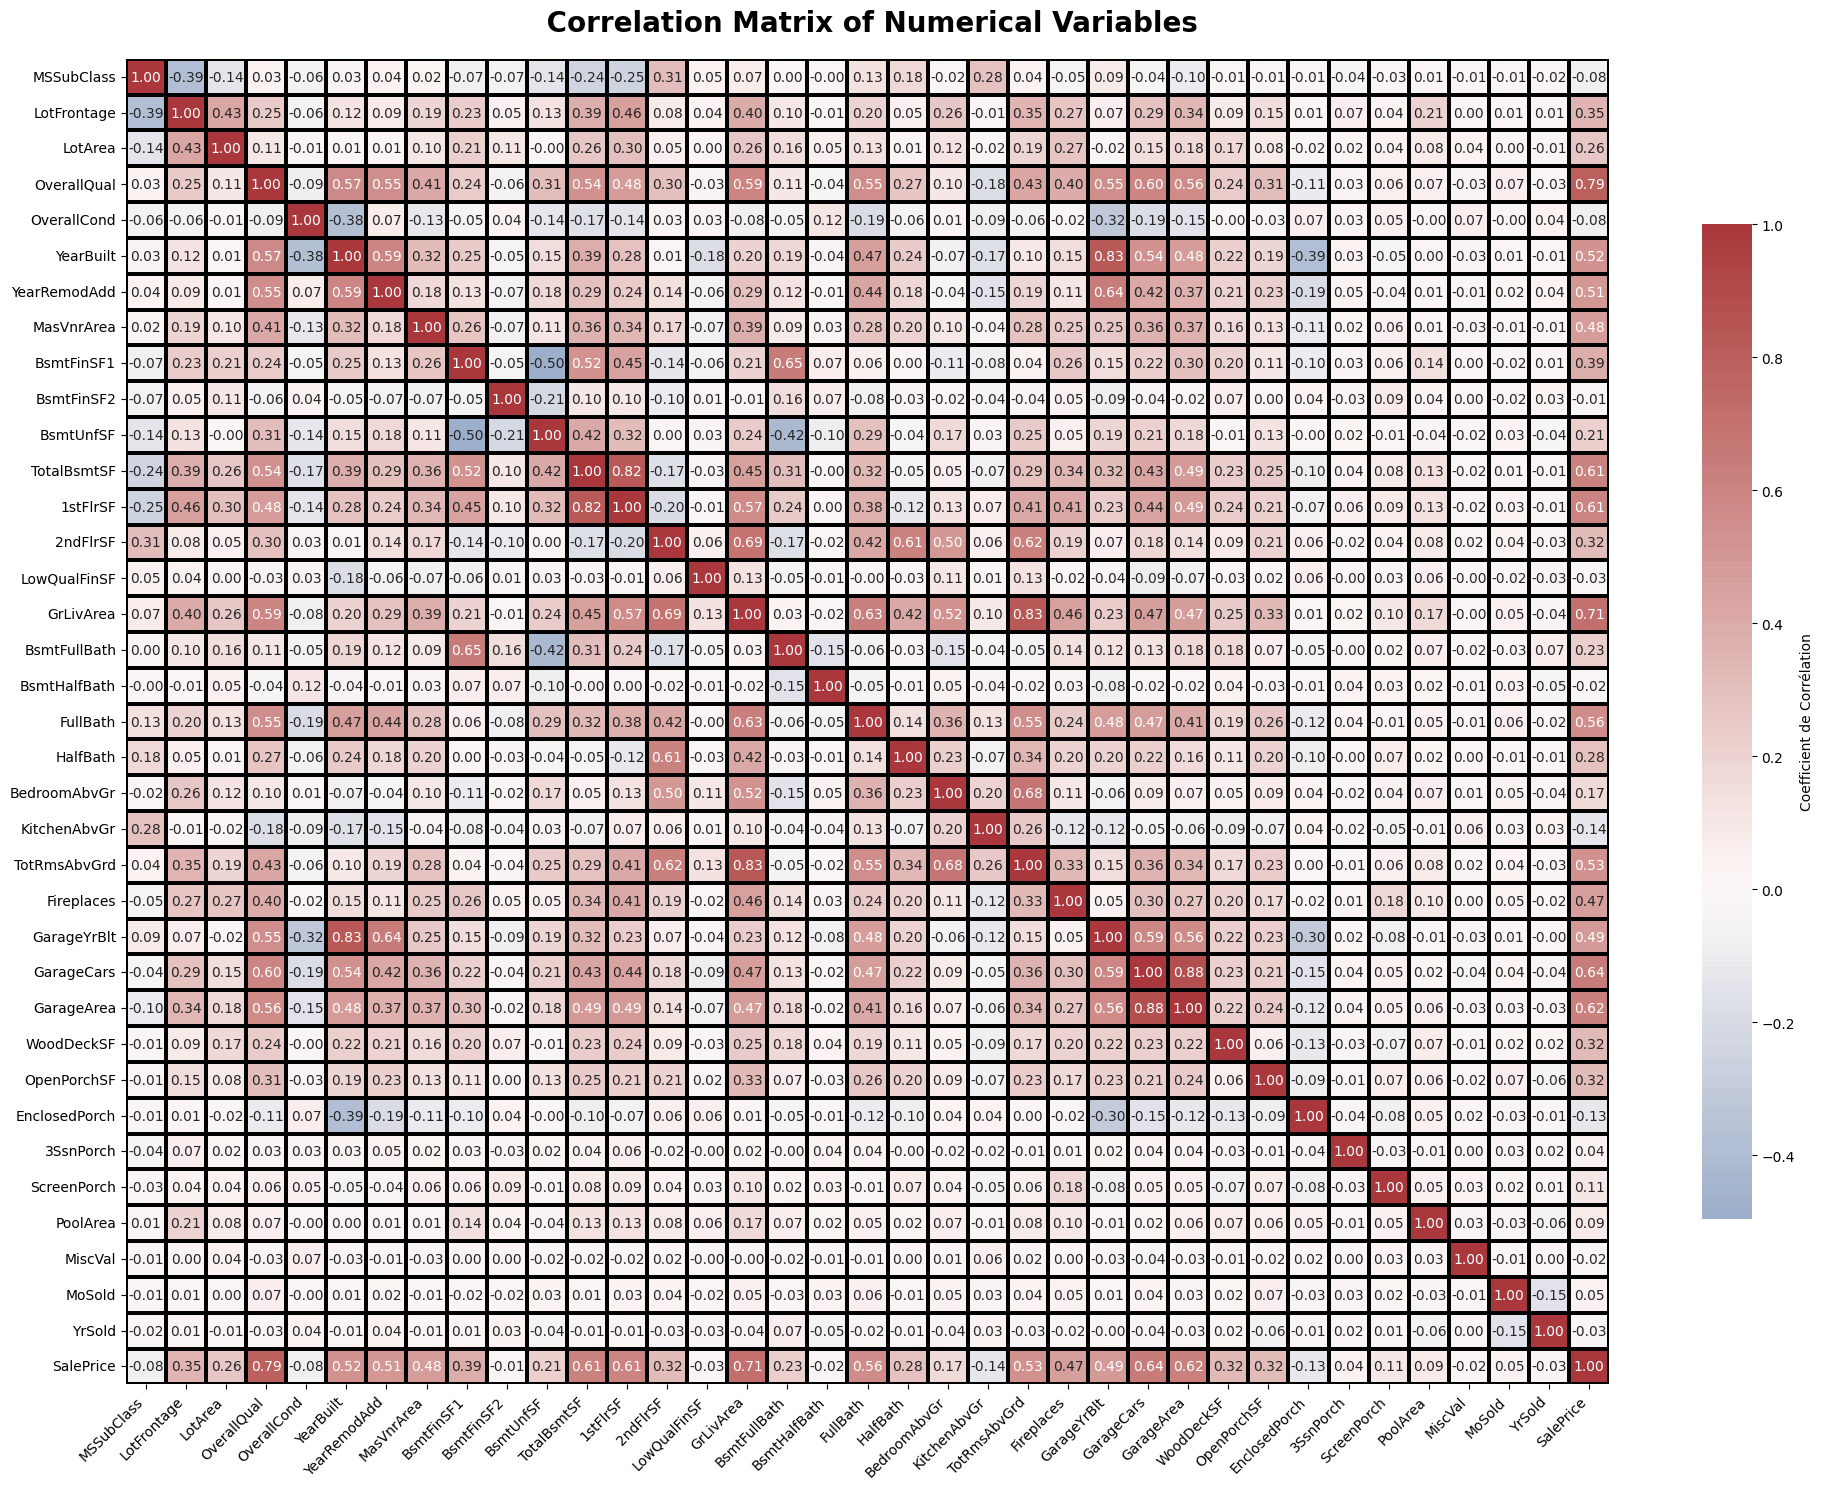

In [16]:
# Correlation Matrix of Numerical Variables
plt.figure(figsize=(20, 15))

sns.heatmap(
    df[num_cols].corr(),
    annot=True,  # Display correlation values
    fmt=".2f",   # Format the annotations to 2 decimal places
    cmap='vlag', # Diverging color map (good for correlation)
    center=0,    # Ensure 0 is the center point for the color scale
    linewidths=1.5, # Add lines between cells for better separation
    linecolor='black', # Color of the lines
    cbar_kws={'shrink': .75, 'orientation': 'vertical', 'label': 'Coefficient de Corrélation'} # Customize the color bar
)

# Improve title visibility and position
plt.title(
    " Correlation Matrix of Numerical Variables",
    fontsize=20,
    fontweight='bold',
    pad=20 # Add padding between the title and the plot
)

# Rotate axis labels for better readability if variable names are long
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Adjust layout to prevent labels from being cut off
plt.tight_layout()

plt.show()

In [17]:
# missing values
missing = data.isna().sum().sort_values(ascending=False)
missing.head(20)

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageQual,81
GarageType,81
GarageFinish,81


In [18]:
# Separate numerical and categorical features
num_cols = data.select_dtypes(include=[np.number]).columns.tolist()
num_cols.remove('SalePrice')  # remove the target column

cat_cols = data.select_dtypes(include=['object']).columns.tolist()

print(f"Number of numerical columns: {len(num_cols)}")
print(f"Number of categorical columns: {len(cat_cols)}")


Number of numerical columns: 36
Number of categorical columns: 43


In [19]:
# Identify NAN columns
# Percentage of missing values per column
missing_percent = data.isna().mean() * 100
print(missing_percent.sort_values(ascending=False).head(20))


PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageQual       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageCond       5.547945
GarageYrBlt      5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtQual         2.534247
BsmtFinType1     2.534247
BsmtCond         2.534247
MasVnrArea       0.547945
Electrical       0.068493
BldgType         0.000000
dtype: float64


In [20]:
cols_to_drop = missing_percent[missing_percent > 50].index
data.drop(cols_to_drop.tolist(), axis=1, inplace=True, errors='ignore')
data.reset_index(drop=True, inplace=True)
data.columns




Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF

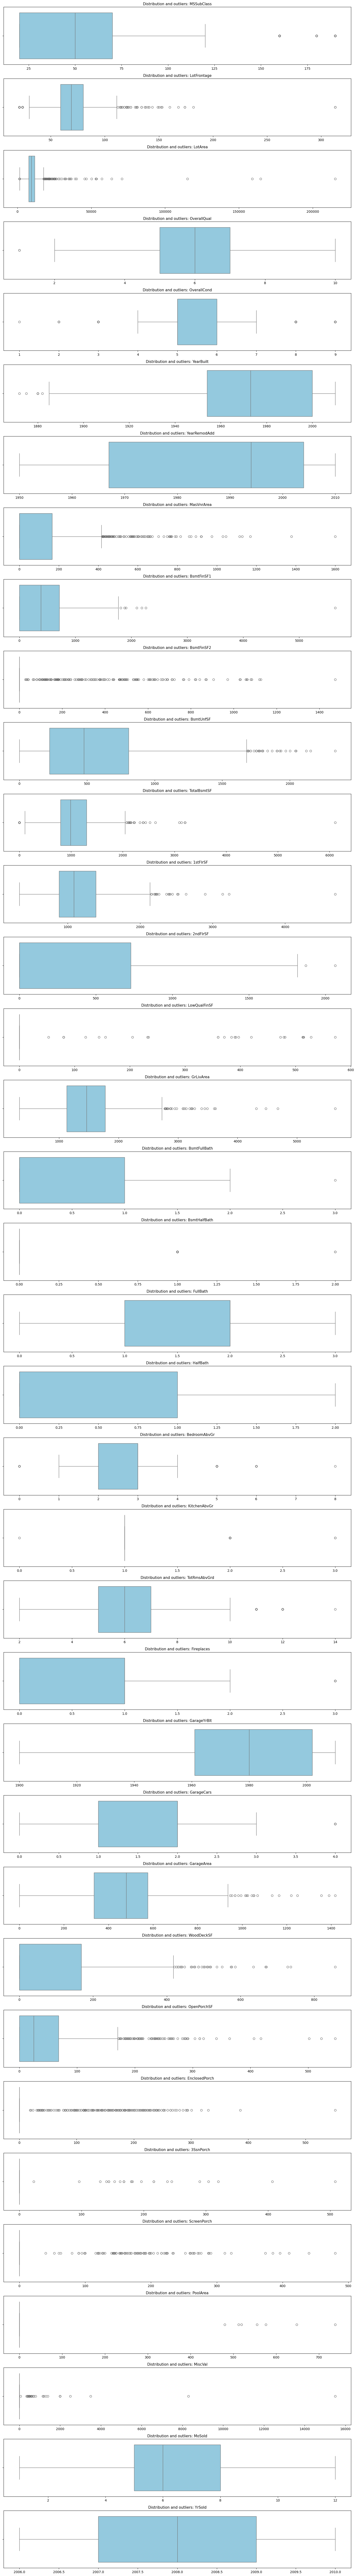

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
num_data = data[num_cols]

# Figure size
plt.figure(figsize=(15, len(num_cols) * 3))

# Create a boxplot for each numerical column
for i, col in enumerate(num_data.columns, 1):
    plt.subplot(len(num_data.columns), 1, i)
    sns.boxplot(x=num_data[col], color="skyblue")
    plt.title(f"Distribution and outliers: {col}", fontsize=11)
    plt.xlabel("")
    plt.tight_layout()

plt.show()



MSSubClass : 103 outliers detected
LotFrontage : 88 outliers detected
LotArea : 69 outliers detected
OverallQual : 2 outliers detected
OverallCond : 125 outliers detected
YearBuilt : 7 outliers detected
MasVnrArea : 96 outliers detected
BsmtFinSF1 : 7 outliers detected
BsmtFinSF2 : 167 outliers detected
BsmtUnfSF : 29 outliers detected
TotalBsmtSF : 61 outliers detected
1stFlrSF : 20 outliers detected
2ndFlrSF : 2 outliers detected
LowQualFinSF : 26 outliers detected
GrLivArea : 31 outliers detected
BsmtFullBath : 1 outliers detected
BsmtHalfBath : 82 outliers detected
BedroomAbvGr : 35 outliers detected
KitchenAbvGr : 68 outliers detected
TotRmsAbvGrd : 30 outliers detected
Fireplaces : 5 outliers detected
GarageCars : 5 outliers detected
GarageArea : 21 outliers detected
WoodDeckSF : 32 outliers detected
OpenPorchSF : 77 outliers detected
EnclosedPorch : 208 outliers detected
3SsnPorch : 24 outliers detected
ScreenPorch : 116 outliers detected
PoolArea : 7 outliers detected
MiscVal :

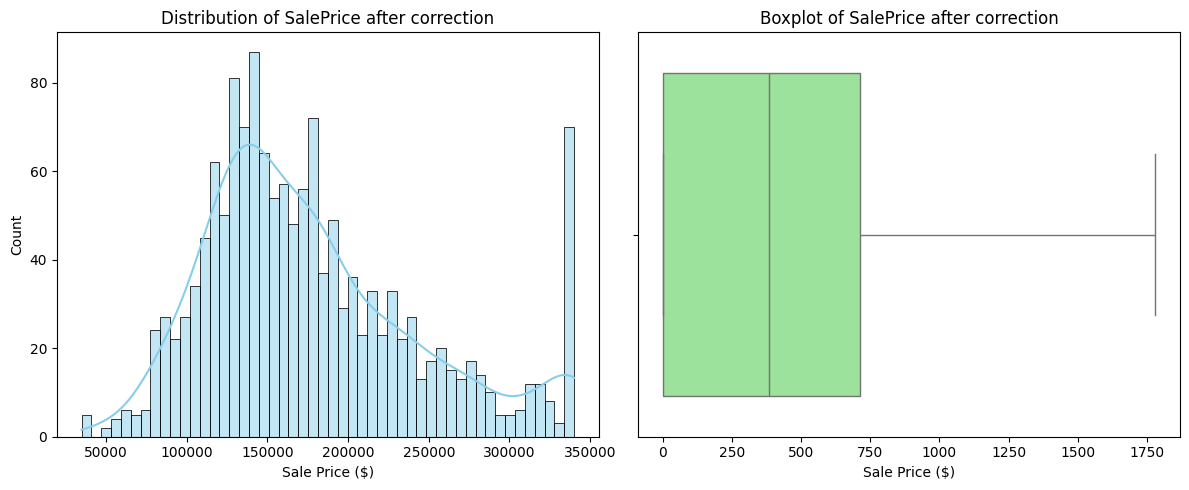

In [22]:
# Create a complete pipeline with model

# 1 Outlier detection using IQR
# ===============================
num_cols = data.select_dtypes(include=[np.number]).columns.tolist()
outliers_dict = {}

for col in num_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    if len(outliers) > 0:
        outliers_dict[col] = (lower_bound, upper_bound)
        print(f"{col} : {len(outliers)} outliers detected")

# 2 Outlier correction using Winsorization
for col, (lower, upper) in outliers_dict.items():
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])

print("\nAll extreme values have been corrected (Winsorization).")

#
# 3 Post-correction verification
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    outlier_count = len(df[(df[col] < lower) | (df[col] > upper)])
    if outlier_count > 0:
        print(f"{col} : {outlier_count} remaining outliers")
    else:
        print(f"{col} : no remaining outliers")

# 4 Visualization after correction (example: SalePrice)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['SalePrice'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of SalePrice after correction")
plt.xlabel("Sale Price ($)")

plt.subplot(1,2,2)
sns.boxplot(x=df['BsmtFinSF1'], color='lightgreen')
plt.title("Boxplot of SalePrice after correction")
plt.xlabel("Sale Price ($)")

plt.tight_layout()
plt.show()


In [23]:
#Verifier
print("Nombre de valeurs manquantes après traitement :")
print(data.isna().sum())

Nombre de valeurs manquantes après traitement :
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 75, dtype: int64


In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# --- Separate features and target ---
y = data['SalePrice']
X = data.drop('SalePrice', axis=1)

# Numerical and categorical columns
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

# --- Pipelines ---
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Fill missing values with median
    ('scaler', StandardScaler())                    # Standardize numerical features
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing values with mode
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # One-hot encode
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

# --- Fit + transform using preprocessor ---
X_processed = preprocessor.fit_transform(X)

# Retrieve proper column names from OneHotEncoder
ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
ohe_cols = ohe.get_feature_names_out(cat_cols) if cat_cols else []

# Create final DataFrame
data_final = pd.DataFrame(X_processed, columns=num_cols + list(ohe_cols))
data_final['SalePrice'] = y.values


In [25]:
import xgboost as xgb

xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42))
])
xgb_pipeline.fit(X, y)
scores_xgb = cross_val_score(xgb_pipeline, X, y, cv=3, scoring='neg_root_mean_squared_error')
print("RMSE CV (XGBoost) : ", -scores_xgb.round(2))
print("RMSE mean : ", -scores_xgb.mean().round(2)  )

RMSE CV (XGBoost) :  [25237.18 32363.81 28562.63]
RMSE mean :  28721.21


In [26]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'model__n_estimators': [100, 300, 500],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__subsample': [0.7, 0.9, 1.0],
    'model__colsample_bytree': [0.7, 0.9, 1.0]
}

xgb_search = RandomizedSearchCV(
    estimator=xgb_pipeline,
    param_distributions=param_grid,
    n_iter=20,
    cv=3,
    scoring='neg_root_mean_squared_error',
    random_state=42,
    n_jobs=-1,
    verbose=2
)

xgb_search.fit(X, y)
print("best params :", xgb_search.best_params_)
print("best RMSE :", -xgb_search.best_score_ )


Fitting 3 folds for each of 20 candidates, totalling 60 fits
best params : {'model__subsample': 0.7, 'model__n_estimators': 500, 'model__max_depth': 5, 'model__learning_rate': 0.1, 'model__colsample_bytree': 0.9}
best RMSE : 26470.590494791668


In [ ]:
# Imports
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
import lightgbm as lgb
!pip install catboost
from catboost import CatBoostRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# --- Pipelines  features ---
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

# Define base models
estimators = [
    ('xgb', xgb.XGBRegressor(n_estimators=500, max_depth=5, learning_rate=0.1, subsample=0.7, colsample_bytree=0.9, random_state=42)),
    ('lgb', lgb.LGBMRegressor(n_estimators=500, max_depth=6, learning_rate=0.05, subsample=0.8, colsample_bytree=0.9, random_state=42)),
    ('cat', CatBoostRegressor(iterations=500, depth=6, learning_rate=0.05, verbose=0, random_state=42))
]

# Stacking
stack_model = StackingRegressor(
    estimators=estimators,
    final_estimator=LinearRegression(),
    cv=3,
    n_jobs=-1
)

# Pipeline complet
stack_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('stack', stack_model)
])
stack_pipeline.fit(X, y)
# Cross-validation
scores = cross_val_score(stack_pipeline, X, y, cv=3, scoring='neg_root_mean_squared_error')
print("RMSE CV (Stacking) : ", -scores)
print("RMSE moyen : ", -scores.mean())


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.7 MB/s eta 0:00:00


In [ ]:
import numpy as np

# --- Prepare the test set ---
X_test = df_test.copy()

# Add missing columns if necessary
for col in X.columns:
    if col not in X_test.columns:
        X_test[col] = np.nan

# Reorder columns to match the training set
X_test = X_test[X.columns]

# --- Predictions on the test set ---
#stack_pipeline.fit(X_train, y_train)

preds = xgb_search.predict(X_test)

# --- Check a few predictions ---
print(preds[:10])


In [ ]:
# 2. Generate the Kaggle submission file
submission = pd.DataFrame({
    "Id": df_test['Id'],
    "SalePrice": preds  # Using the predictions (inversed if needed)
})

# 3. Save as CSV
submission_file = "submission_rf_corrected.csv"
submission.to_csv(submission_file, index=False)
print(f" Corrected submission file generated: {submission_file}")
